In [1]:
pip install bnlp_toolkit

  Obtaining dependency information for bnlp_toolkit from https://files.pythonhosted.org/packages/af/99/5d688fc2e5f6494d6c0a4e6bcdc8192266869caeef3b41dbc3dc8358616d/bnlp_toolkit-4.0.0-py3-none-any.whl.metadata
  Obtaining dependency information for ftfy from https://files.pythonhosted.org/packages/91/f8/dfa32d06cfcbdb76bc46e0f5d69c537de33f4cedb1a15cd4746ab45a6a26/ftfy-6.1.3-py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.4/175.4 kB 7.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
  Obtaining dependency information for wcwidth<0.3.0,>=0.2.12 from https://files.pythonhosted.org/packages/31/b1/a59de0ad3aabb17523a39804f4c6df3ae87ead053a4e25362ae03d73d03a/wcwidth-0.2.12-py2.py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.5/993.5 kB 37.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.4/53.4 kB 5.3 MB/s eta 0:00:00
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171033 sha256=fe5a9cc274

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bnlp import CleanText
from sklearn.feature_extraction.text import TfidfVectorizer
from bnlp import NLTKTokenizer

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
train_df = pd.read_excel("/kaggle/input/bemoc-dataset/cleaned_BEmoC7k.xlsx")

In [4]:
train_df.head()

,TEXT,classes
0,নাইমা কি করবেন আমরা জানি,sadness
1,ভাই সব আপনাদের খুব ভাল লাগছে,joy
2,গাঞ্জা খাইয়া নিউজ শেয়ার করছে দিগন্ত বয়কটে ...,anger
3,অনেক ধন্যবাদ স্যার যশোরে ইত্যাদি অনুষ্ঠান করার...,joy
4,বর্তমানে মুসলমান মারে যে জন সে জন হয়েছে ঈশ্বর,disgust


In [5]:
train_df.dropna(inplace=True)

In [6]:
longest_string = max(train_df["TEXT"], key=len)
print(len(longest_string))

1093


In [7]:
clean_text = CleanText(
   fix_unicode=True,
   unicode_norm=True,
   unicode_norm_form="NFKC",
   remove_url=False,
   remove_email=False,
   remove_emoji=False,
   remove_number=False,
   remove_digits=False,
   remove_punct=False,
   replace_with_url="<URL>",
   replace_with_email="<EMAIL>",
   replace_with_number="<NUMBER>",
   replace_with_digit="<DIGIT>",
   replace_with_punct = "<PUNC>"
)

train_df['TEXT'] = train_df['TEXT'].apply(clean_text)

In [8]:
longest_string = max(train_df["TEXT"], key=len)
print(len(longest_string))

1120


In [9]:
train_df["classes"].value_counts()

classes
joy         1524
disgust     1356
sadness     1327
anger       1052
fear         962
surprise     779
Name: count, dtype: int64

In [10]:
# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer()

# Fit and transform the text data
tfidf_matrix = tfidf.fit_transform(train_df['TEXT'])

# Get feature names (words)
feature_names = tfidf.get_feature_names_out()

# Create a DataFrame of TF-IDF scores
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)

# Find mean TF-IDF score for each word across all documents
word_scores = tfidf_df.mean(axis=0)

# Set a threshold to identify less important words (adjust threshold as needed)
threshold = 0.00003 # For example, you can set a threshold value

# Get less important words based on threshold
less_important_words = word_scores[word_scores < threshold]

# Display words that will be removed
print("Less important words:")
print(less_important_words)

Less important words:
অবসরপ    0.000025
অলকবন    0.000030
কনককঙ    0.000030
চরণমঞ    0.000030
চলরত     0.000026
চশক      0.000029
জনসভ     0.000016
জমত      0.000024
টচন      0.000030
নববন     0.000029
পটপসহ    0.000026
বনমরণ    0.000030
বরফই     0.000024
যতন      0.000030
রজম      0.000030
dtype: float64


In [11]:
from bnlp import NLTKTokenizer

In [12]:
# Initialize tokenizer
bnltk = NLTKTokenizer()

# Function to remove less important words
def remove_less_important_words(text):
    words = bnltk.word_tokenize(text)
    filtered_words = [word for word in words if word not in less_important_words]
    return ' '.join(filtered_words)

# Apply the function to 'text' column in the DataFrame
train_df['TEXT'] = train_df['TEXT'].apply(remove_less_important_words)

In [13]:
train_df

,TEXT,classes
0,নাইমা কি করবেন আমরা জানি,sadness
1,ভাই সব আপনাদের খুব ভাল লাগছে,joy
2,গাঞ্জা খাইয়া নিউজ শেয়ার করছে দিগন্ত বয়কটে ক...,anger
3,অনেক ধন্যবাদ স্যার যশোরে ইত্যাদি অনুষ্ঠান করার...,joy
4,বর্তমানে মুসলমান মারে যে জন সে জন হয়েছে ঈশ্বর,disgust
...,...,...
6995,হে আল্লাহ আপনি আমাদের দেশের প্রতি সহায়ক হন আর...,sadness
6996,ঈদ ছারাও যুদি বাংলাদেশ ঈদের খুশির অামেজ পান তব...,joy
6997,বছরের সবচেয়ে সেরা ভিডিও দেখেছি আমাদের দেশের স...,joy
6998,কিরে মিথ্যা কথা কস কেন গতদিন আমি আর আসিফ আসছি ...,anger


In [14]:
train_df

,TEXT,classes
0,নাইমা কি করবেন আমরা জানি,sadness
1,ভাই সব আপনাদের খুব ভাল লাগছে,joy
2,গাঞ্জা খাইয়া নিউজ শেয়ার করছে দিগন্ত বয়কটে ক...,anger
3,অনেক ধন্যবাদ স্যার যশোরে ইত্যাদি অনুষ্ঠান করার...,joy
4,বর্তমানে মুসলমান মারে যে জন সে জন হয়েছে ঈশ্বর,disgust
...,...,...
6995,হে আল্লাহ আপনি আমাদের দেশের প্রতি সহায়ক হন আর...,sadness
6996,ঈদ ছারাও যুদি বাংলাদেশ ঈদের খুশির অামেজ পান তব...,joy
6997,বছরের সবচেয়ে সেরা ভিডিও দেখেছি আমাদের দেশের স...,joy
6998,কিরে মিথ্যা কথা কস কেন গতদিন আমি আর আসিফ আসছি ...,anger


In [15]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(train_df, test_size=0.2,stratify=train_df['classes'],random_state=42)


In [16]:
X_train  =  train_df['TEXT'].values.tolist()
y_train = train_df['classes'].tolist()

In [17]:
X_test =  test_df['TEXT'].values.tolist()
y_test = test_df['classes'].tolist()

In [18]:
pip install ktrain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 52.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 54.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
  Obtaining dependency information for chardet from https://files.pythonhosted.org/packages/38/6f/f5fbc992a329ee4e0f288c1fe0e2ad9485ed064cac731ed2fe47dcc38cbf/chardet-5.2.0-py3-none-any.whl.metadata
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.8/468.8 kB 37.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.4/199.4 kB 16.6

In [19]:
import ktrain
from ktrain import text
MODEL_NAME = 'csebuetnlp/banglabert'
t = text.Transformer(MODEL_NAME, maxlen=500)

config.json:   0%|          | 0.00/586 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/443M [00:00<?, ?B/s]

In [20]:
trn = t.preprocess_train(X_train, y_train)
val = t.preprocess_test(X_test, y_test)

preprocessing train...
language: bn
train sequence lengths:
	mean : 21
	95percentile : 41
	99percentile : 57


tokenizer_config.json:   0%|          | 0.00/119 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/528k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Is Multi-Label? False
preprocessing test...
language: bn
test sequence lengths:
	mean : 21
	95percentile : 41
	99percentile : 61


In [21]:
print(trn)

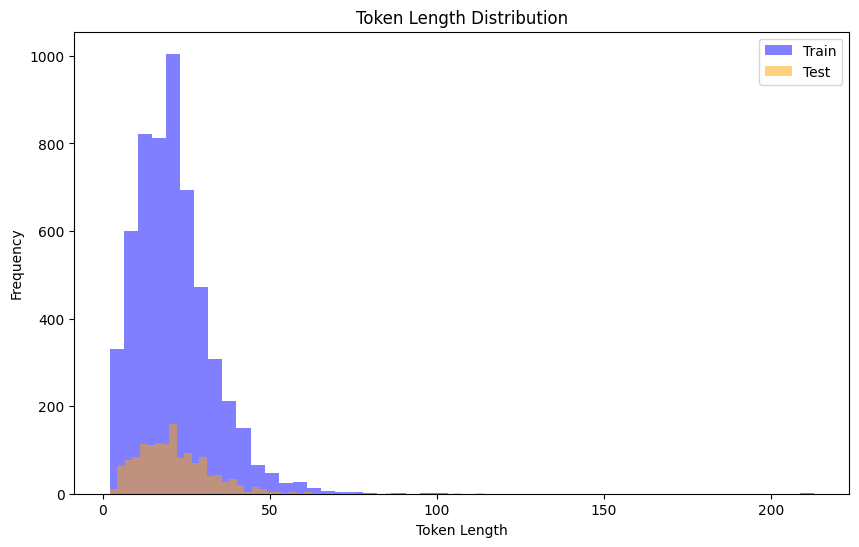

In [22]:
import matplotlib.pyplot as plt

# Calculate token lengths for train and test datasets
train_token_lengths = [len(t.split()) for t in X_train]
test_token_lengths = [len(t.split()) for t in X_test]

# Plot token length distribution
plt.figure(figsize=(10, 6))
plt.hist(train_token_lengths, bins=50, alpha=0.5, color='blue', label='Train')
plt.hist(test_token_lengths, bins=50, alpha=0.5, color='orange', label='Test')
plt.xlabel('Token Length')
plt.ylabel('Frequency')
plt.title('Token Length Distribution')
plt.legend()
plt.show()

In [23]:
model = t.get_classifier()

In [24]:
learner = ktrain.get_learner(model, train_data=trn, val_data=val, batch_size=8)

In [25]:
# Adding early stopping callback from TensorFlow
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, mode='auto')

In [26]:
history = learner.autofit(1e-5, 10, callbacks=[early_stopping])



begin training using triangular learning rate policy with max lr of 1e-05...
Epoch 1/10
700/700 [==============================] - 424s 572ms/step - loss: 1.4649 - accuracy: 0.4263 - val_loss: 1.0358 - val_accuracy: 0.6143
Epoch 2/10
700/700 [==============================] - 397s 568ms/step - loss: 0.9261 - accuracy: 0.6752 - val_loss: 0.8213 - val_accuracy: 0.6979
Epoch 3/10
700/700 [==============================] - 398s 568ms/step - loss: 0.7094 - accuracy: 0.7539 - val_loss: 0.7757 - val_accuracy: 0.7193
Epoch 4/10
700/700 [==============================] - 397s 567ms/step - loss: 0.5669 - accuracy: 0.8030 - val_loss: 0.7899 - val_accuracy: 0.7214
Epoch 5/10
700/700 [==============================] - 397s 567ms/step - loss: 0.4562 - accuracy: 0.8462 - val_loss: 0.8244 - val_accuracy: 0.7236
Epoch 6/10
700/700 [==============================] - 397s 567ms/step - loss: 0.3841 - accuracy: 0.8782 - val_loss: 0.8671 - val_accuracy: 0.7264
Epoch 7/10
700/700 [=========================

In [27]:
# Save the trained model
learner.save_model('/kaggle/output/bemoc.zip')

In [28]:
classes=t.get_classes()

In [29]:
cm = learner.validate(class_names=t.get_classes())

44/44 [==============================] - 11s 183ms/step
              precision    recall  f1-score   support

       anger       0.67      0.46      0.55       211
     disgust       0.54      0.66      0.60       271
        fear       0.87      0.78      0.82       192
         joy       0.84      0.87      0.85       305
     sadness       0.70      0.78      0.74       265
    surprise       0.72      0.63      0.67       156

    accuracy                           0.71      1400
   macro avg       0.72      0.70      0.71      1400
weighted avg       0.72      0.71      0.71      1400

